# CSCI 443 Lecture 19 Notes

## A/B Permutation Test

Using incadescent vs. led lights as an example.

Lifespans are likely to look something like exponential.  Exponential
distributions are heavily skewed and thus it takes a fair number (often
30 or more) samples before the sampling distribution resembles a
Gaussian.

A permutation test solves this problem by allowing us to construct an
approximate sampling distribution for a distribution by combining the 
datasets into a single dataset and then constructing new subsets by
resampling the combined dataset many times and measuring a test
statistic (e.g., the sample mean).  The distribution of the test
statistic computed over resampled datasets is called the 
"permutation distribution."  We treat the permutation distribution
in the same way we would a sampling distribution.

let \\(X =\\) lifespan of an incadescent light bulb (in years)

let \\(Y =\\) lifespan of an LED light bulb (in years)

let \\(H_0: \mu_x = \mu_y\\)

let \\(H_A: \mu_x \neq \mu_y\\)

Below we show histograms of the lifespans of the incandescent light
bulbs and LED light bulbs used in our tests.  On the lower of the two figures
we show the raw samples on one line for LED light bulbs and one line for 
incandescent light bulbs.

length of trial (in years)=2.0947100472456643


<Figure size 640x480 with 0 Axes>

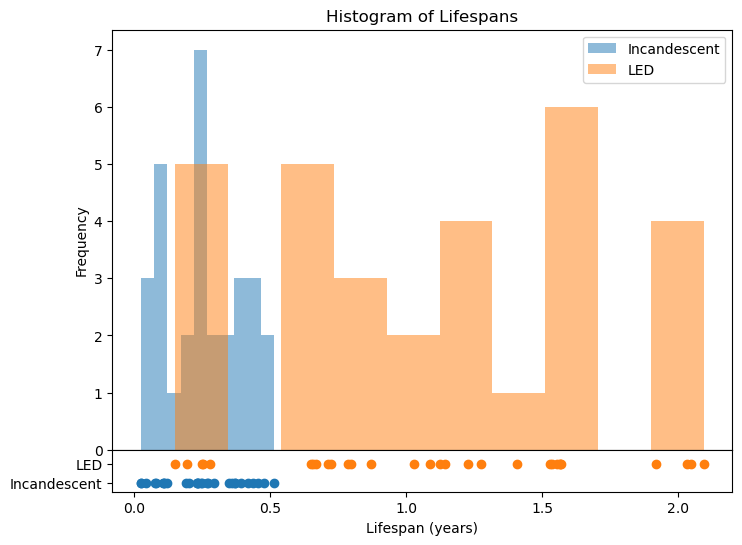

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(33)

def plot_lifespan_histograms(A, B, A_label, B_label):
    # Plotting
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    fig, axs = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [10, 1]})
    fig.subplots_adjust(hspace=0)
    
    
    # Top plot: Histograms
    axs[0].hist(A, alpha=0.5, label=A_label, bins=10)
    axs[0].hist(B, alpha=0.5, label=B_label, bins=10)
    axs[0].set_title('Histogram of Lifespans')
    axs[0].set_ylabel('Frequency')
    axs[0].legend()
    
    axs[0].tick_params(axis='x',          # Changes apply to the x-axis
                       which='both',      # Both major and minor ticks are affected
                       bottom=False,      # Ticks along the bottom edge are off
                       top=False,         # Ticks along the top edge are off
                       labelbottom=False) # Labels along the bottom edge are off
    
    # Bottom plot: Real line with raw samples
    axs[1].plot(A, np.zeros_like(A), 'o', label=A_label)
    axs[1].plot(B, np.ones_like(B), 'o', label=B_label)
    axs[1].set_yticks([0, 1])
    axs[1].set_yticklabels([A_label, B_label])
    axs[1].set_xlabel('Lifespan (years)')
    axs[1].set_ylim(-0.5,1.8)
    
    #plt.tight_layout()
    plt.show() 
    
# Generate 100 lifespans for incandescent bulbs (X) and LED bulbs (Y)
# Assume exponential distribution, mean lifespan: 1 year for incandescent, 5.6 years for LED
incandescent_lifespans = np.random.exponential(scale=1.3, size=100)
led_lifespans = np.random.exponential(scale=5, size=100)

# Sort the lifespans and keep the 30 smallest samples of each
incandescent_lifespans_sorted = np.sort(incandescent_lifespans)[:30]
led_lifespans_sorted = np.sort(led_lifespans)[:30]
print(f"length of trial (in years)={max(led_lifespans_sorted[-1], incandescent_lifespans_sorted[-1])}")

plot_lifespan_histograms(incandescent_lifespans_sorted, 
                         led_lifespans_sorted, 
                         A_label="Incandescent", B_label="LED")




## Step 1: Combine samples from the groups into a single set

We show below the histogram that results for the combined distribution, 
i.e., the distribution of the LED lifetime samples combined 
with the incadescent light bulb samples.

(-0.5, 2.8)

<Figure size 640x480 with 0 Axes>

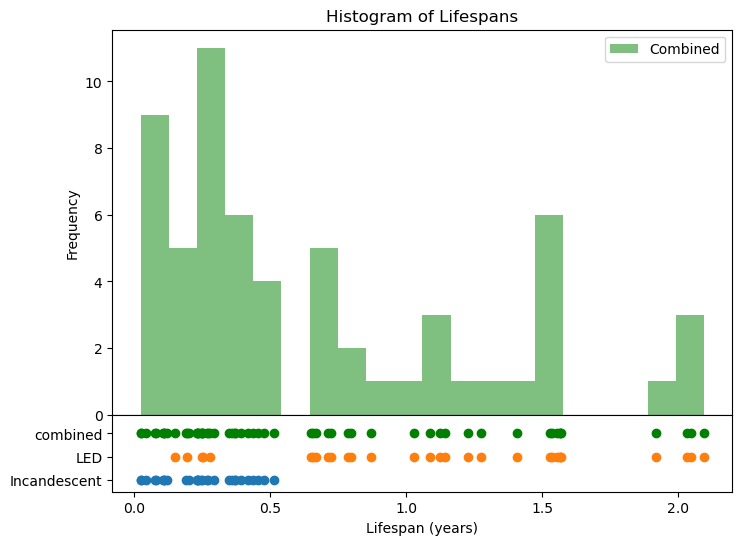

In [123]:
# Plotting
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
fig, axs = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [10, 2]})
fig.subplots_adjust(hspace=0)

combined_lifespans = np.append(incandescent_lifespans_sorted, led_lifespans_sorted)

axs[0].hist(combined_lifespans, alpha=0.5, label='Combined', bins=20, color="green")
axs[0].set_title('Histogram of Lifespans')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].tick_params(axis='x',          # Changes apply to the x-axis
                   which='both',      # Both major and minor ticks are affected
                   bottom=False,      # Ticks along the bottom edge are off
                   top=False,         # Ticks along the top edge are off
                   labelbottom=False) # Labels along the bottom edge are off


axs[1].plot(incandescent_lifespans_sorted, np.zeros_like(incandescent_lifespans_sorted),
            'o', label='Incandescent')
axs[1].plot(led_lifespans_sorted, np.ones_like(led_lifespans_sorted), 'o', label='LED')
axs[1].plot(combined_lifespans, np.ones_like(combined_lifespans) + 1, 'o', 
            label='combined',color="green")
axs[1].set_yticks([0, 1, 2])
axs[1].set_yticklabels(['Incandescent', 'LED', 'combined'])
axs[1].set_xlabel('Lifespan (years)')
axs[1].set_ylim(-0.5,2.8)


## Step 2 and 3: resample.

Shuffle the combined dataset and randomly draw without replace a set that is 
the same size as A (LED lightbulb lifetimes) and B (incandescent light
bulb lifetimes).

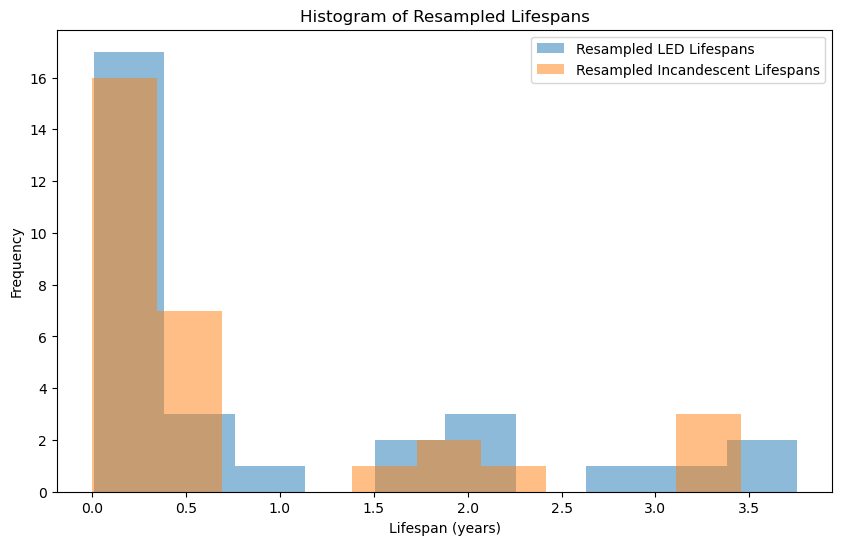

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def resample_without_replacement(A, B):
    # Combine the two arrays
    combined = np.concatenate((A, B))
    
    # Shuffle the combined array
    shuffled = np.random.permutation(combined)
    
    # Split the shuffled array into two parts with the original sizes
    A_resampled = shuffled[:len(A)]
    B_resampled = shuffled[len(A):]
    
    return A_resampled, B_resampled


# Defining the resample_without_replacement function
def resample_without_replacement(A, B):
    # Combine the two arrays
    combined = np.concatenate((A, B))
    
    # Shuffle the combined array
    shuffled = np.random.permutation(combined)
    
    # Split the shuffled array into two parts with the original sizes
    A_resampled = shuffled[:len(A)]
    B_resampled = shuffled[len(A):]
    
    return A_resampled, B_resampled

# Define the plotting function
def plot_resampled_histogram(A_resampled, B_resampled):
    """
    Plot a histogram of the resampled distribution for two sample sets A and B.
    """
    plt.figure(figsize=(10, 6))
    
    # Plotting the histograms for A_resampled and B_resampled
    plt.hist(A_resampled, alpha=0.5, label='Resampled LED Lifespans', bins=10)
    plt.hist(B_resampled, alpha=0.5, label='Resampled Incandescent Lifespans', bins=10)
    
    plt.title('Histogram of Resampled Lifespans')
    plt.xlabel('Lifespan (years)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Assuming led_lifespans_sorted and incandescent_lifespans_sorted are defined as follows
led_lifespans_sorted = np.sort(np.random.exponential(scale=10, size=100))[:30]
incandescent_lifespans_sorted = np.sort(np.random.exponential(scale=1, size=100))[:30]

# Run the resampling function
A_resampled, B_resampled = resample_without_replacement(led_lifespans_sorted, incandescent_lifespans_sorted)

# Plot the histogram of the resample distribution
plot_resampled_histogram(A_resampled, B_resampled)


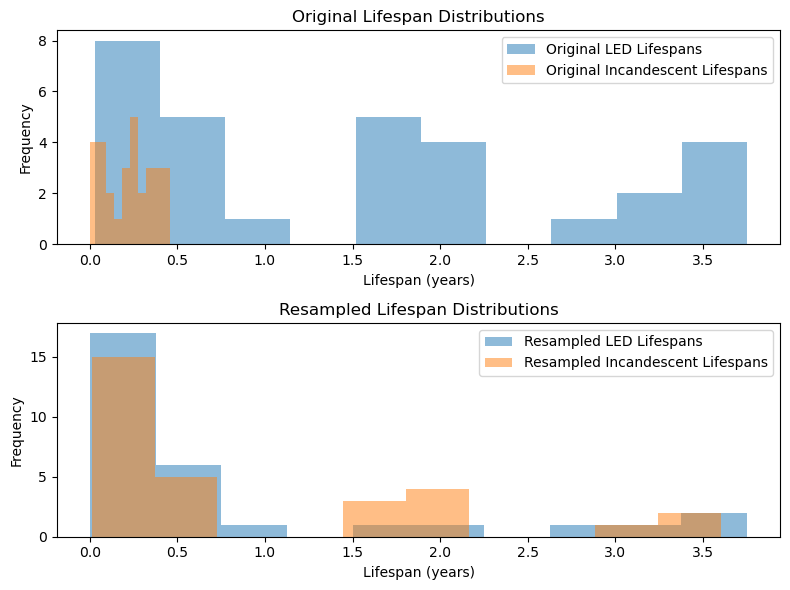

In [29]:
def plot_original_and_resampled_distributions(led_lifespans, incandescent_lifespans):
    """
    Create two plots, one above the other:
    - The top plot shows the original histograms of LED and incandescent bulb lifespans.
    - The bottom plot shows the histograms of the resampled distributions.
    """
    # Resample the distributions without replacement
    led_resampled, incandescent_resampled = resample_without_replacement(led_lifespans, incandescent_lifespans)
    
    fig, axs = plt.subplots(2, 1, figsize=(8, 6))
    
    # Top plot: Original distributions
    axs[0].hist(led_lifespans, alpha=0.5, label='Original LED Lifespans', bins=10)
    axs[0].hist(incandescent_lifespans, alpha=0.5, label='Original Incandescent Lifespans', bins=10)
    axs[0].set_title('Original Lifespan Distributions')
    axs[0].set_xlabel('Lifespan (years)')
    axs[0].set_ylabel('Frequency')
    axs[0].legend()
    
    # Bottom plot: Resampled distributions
    axs[1].hist(led_resampled, alpha=0.5, label='Resampled LED Lifespans', bins=10)
    axs[1].hist(incandescent_resampled, alpha=0.5, label='Resampled Incandescent Lifespans', bins=10)
    axs[1].set_title('Resampled Lifespan Distributions')
    axs[1].set_xlabel('Lifespan (years)')
    axs[1].set_ylabel('Frequency')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

plot_original_and_resampled_distributions(led_lifespans_sorted, incandescent_lifespans_sorted)



## Step 4: Measure the test statistic

In this case the test statistic is the difference in the means between groups A and B,
where A and B are the resampled subsets of the combined dataset containing
LED and incandescent light bulb lifespans.

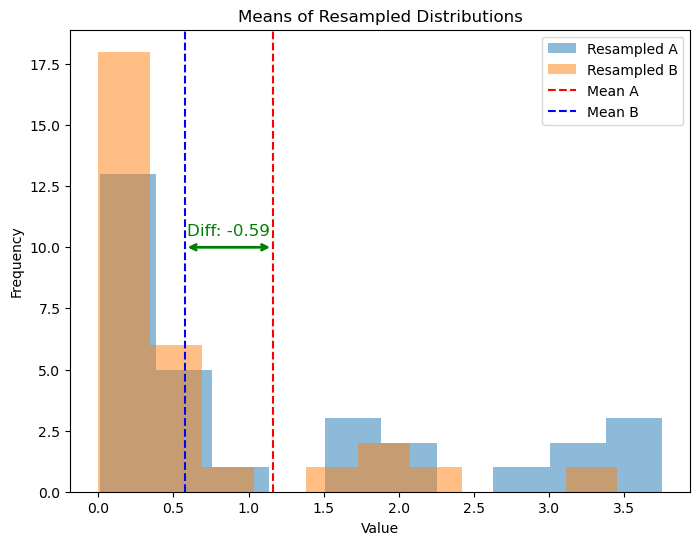

In [37]:
def plot_means_with_resampling_and_arrow(A, B):
    # Resample without replacement
    A_resampled, B_resampled = resample_without_replacement(A, B)
    
    # Calculate means of the resampled distributions
    mean_A = np.mean(A_resampled)
    mean_B = np.mean(B_resampled)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.hist(A_resampled, alpha=0.5, label='Resampled A', bins=10)
    plt.hist(B_resampled, alpha=0.5, label='Resampled B', bins=10)
    plt.axvline(mean_A, color='red', linestyle='--', label='Mean A')
    plt.axvline(mean_B, color='blue', linestyle='--', label='Mean B')
    
    # Drawing a double-ended arrow between the two means
    plt.annotate('', xy=(mean_A, 10), xytext=(mean_B, 10),
                 arrowprops=dict(arrowstyle="<->", lw=2.0, color='green'))
    
    # Adding text to indicate the difference
    mid_point = (mean_A + mean_B) / 2
    plt.text(mid_point, 10.5, f'Diff: {mean_B - mean_A:.2f}', color='green', ha='center', fontsize=12)
    
    plt.legend()
    plt.title('Means of Resampled Distributions')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

np.random.seed(17)
plot_means_with_resampling_and_arrow(led_lifespans_sorted, incandescent_lifespans_sorted)



## Step 5: Create Permutation Distribution

Resample R times to create a permutation distribution of the differences in
the means between group A and group B.  The permutation distribution 
estimates the sampling distribution.

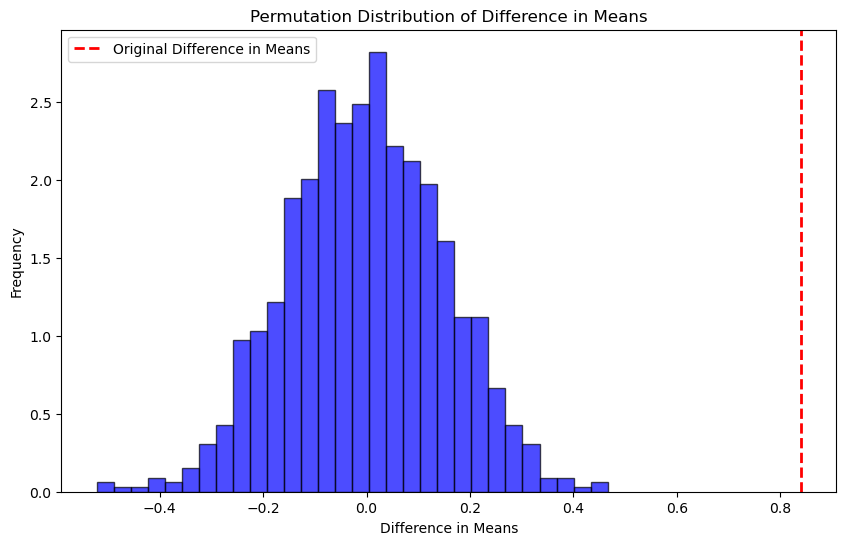

In [124]:
def permutation_test_statistic(A, B, R=1000):
    """
    Perform a permutation test R times using the difference in means between two sample sets
    as the test statistic. Then, plot the permutation distribution of the difference in
    the sample means.
    
    Parameters:
    A (np.array): First sample set.
    B (np.array): Second sample set.
    R (int): Number of resamplings to perform.
    """
    permutation_diffs = []
    combined_samples = np.concatenate((A, B))
    
    for _ in range(R):
        # Combine the samples
        # Shuffle the combined samples
        np.random.shuffle(combined_samples)
        
        # Split the shuffled array back into two parts
        A_perm = combined_samples[:len(A)]
        B_perm = combined_samples[len(A):]
        
        # Calculate the difference in means for the permutation samples
        perm_diff = np.mean(A_perm) - np.mean(B_perm)
        permutation_diffs.append(perm_diff)
    
    return permutation_diffs

def plot_permutation_distribution(A, B, permutation_diffs, bins=30):
    original_diff = np.mean(A) - np.mean(B)

    # Plotting the permutation distribution
    plt.figure(figsize=(10, 6))
    plt.hist(permutation_diffs, bins, density=True, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(original_diff, color='red', linestyle='--', linewidth=2, label='Original Difference in Means')
    plt.title('Permutation Distribution of Difference in Means')
    plt.xlabel('Difference in Means')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


# Assuming led_lifespans_sorted and incandescent_lifespans_sorted are already defined
# Here's how you might call the function, using sample data for demonstration
permutation_diffs = permutation_test_statistic(led_lifespans_sorted, 
                                               incandescent_lifespans_sorted, R=1000)
plot_permutation_distribution(led_lifespans_sorted, incandescent_lifespans_sorted, 
                              permutation_diffs)


In [49]:
def compute_p_value(permutation_diffs, original_diff):
    # Two-tailed test p-value
    extreme_values = np.abs(permutation_diffs) >= np.abs(original_diff)
    p_value = np.mean(extreme_values)
    4
    return p_value


original_diff = np.mean(led_lifespans_sorted) - np.mean(incandescent_lifespans_sorted)
                                               
# Assuming permutation_diffs and original_diff are already defined
p_value = compute_p_value(permutation_diffs, original_diff)

print(f"P-value: {p_value}")


P-value: 0.0


A p-value of 0.0 only occurs because the permutation distribution has 
no sample differences the original differences in the means between
the LED and incadescent light bulb lifetime samples.  Perhaps
we simply didn't generate enough resamples for aour permutation
distribution to flesh out the distribution tails.

I tried increasing the number of resamples multiple times to see if I 
get enough of a tail for the p-value to go about 0, but this didn't 
happen even when I went to 10,000,000 resamples.

len(A)=30
len(b)=30
len(combined_samples)=60
10000000


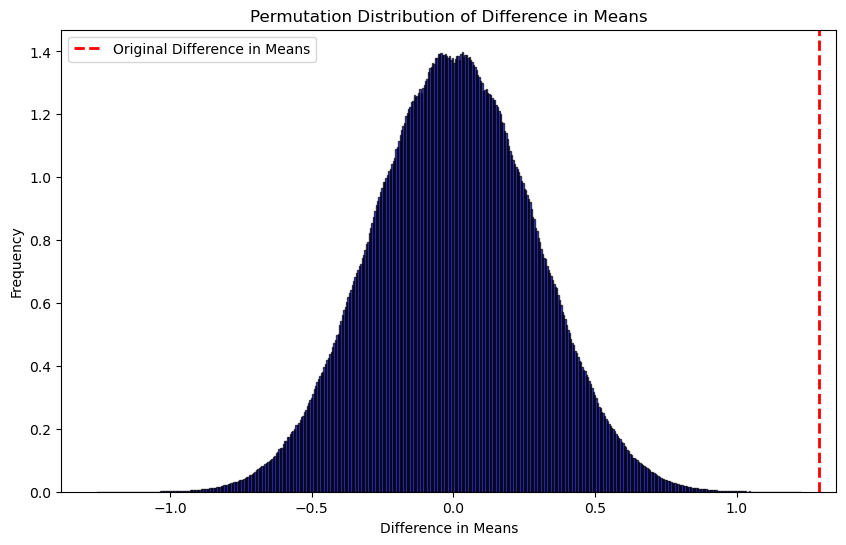

In [73]:
permutation_diffs = permutation_test_statistic(led_lifespans_sorted, 
                                               incandescent_lifespans_sorted, R=10000000)
print(len(permutation_diffs))
plot_permutation_distribution(led_lifespans_sorted, incandescent_lifespans_sorted, 
                              permutation_diffs, bins=500)

P-value: 0.0


# Zombivia

Let's try permutation tests on a different dataset.  Let's go back to the
Zombify trial example and see how permuation testing affects the result.

Before anyone has taken Zombivia, the plot below shows that at least with 
respect to blood pressure, the distributions for controlled and exposed
groups look nearly identical.  Any deviation could be due only to 
random variation.

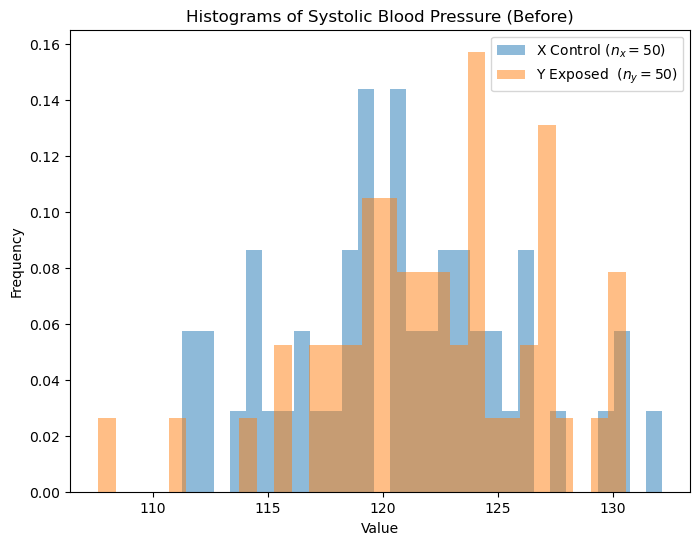

\\[\bar{x} =120.8 ,\quad \bar{y} =122.1\\]

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Set the seed for reproducibility
np.random.seed(42)

# Generate samples
X = np.random.normal(122, np.sqrt(30), 50)
Y = np.random.normal(122, np.sqrt(30), 50)

# Plotting
plt.figure(figsize=(8, 6))

plt.hist(X, bins=30, alpha=0.5, density=True, label='X Control ($n_x = 50$)')
plt.hist(Y, bins=30, alpha=0.5, density=True, label='Y Exposed  ($n_y = 50$)')

plt.title('Histograms of Systolic Blood Pressure (Before)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

display(Markdown(r"\\[\bar{x} =" + f"{np.mean(X):.1f}" + 
                 r" ,\quad \bar{y} =" + f"{np.mean(Y):.1f}" + r"\\]"))



After 1 week, we can a stark separation in the blood pressure
distributions between the exposed and control groups.  The difference 
is so stark that when I compute the t-statistic for the differences
in means between these two groups, I get t=12.65, which is enormous.

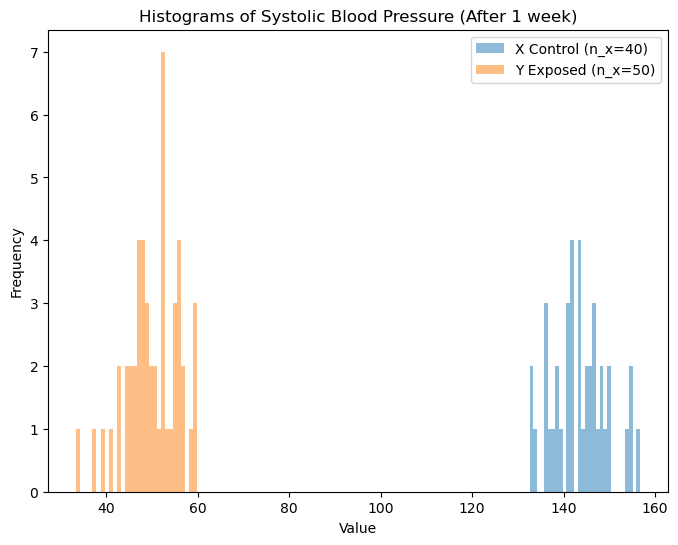

\\[\bar{x} =143.6 ,\quad \bar{y} =50.0\\]

\\[s_x =6.0 ,\quad s_y =5.8\\]

\\[s_x^2 = 36.3, \quad s_y^2 =33.8, \quad s_p^2 =34.9\\]

\\[s_x = 6.0, \quad s_y =5.8, \quad s_p =5.9\\]

\\[\bar{x} = 143.62, \quad \bar{y} = 49.98\\]

\\[SE_{\bar{x}-\bar{y}} = 7.40\\]

\\[t = 12.65\\]

\\[df = 88\\]

\\[p = 1.659307456321507e-21\\]

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Set the seed for reproducibility
np.random.seed(42)

# Generate samples
X = np.random.normal(145, np.sqrt(40), 40)
Y = np.random.normal(50, np.sqrt(40), 50)

# Plotting
plt.figure(figsize=(8, 6))

plt.hist(X, bins=30, alpha=0.5, label='X Control (n_x=40)')
plt.hist(Y, bins=30, alpha=0.5, label='Y Exposed (n_x=50)')

plt.title('Histograms of Systolic Blood Pressure (After 1 week)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

display(Markdown(r"\\[\bar{x} =" + f"{np.mean(X):.1f}" + 
                 r" ,\quad \bar{y} =" + f"{np.mean(Y):.1f}" + r"\\]"))

display(Markdown(r"\\[s_x =" + f"{np.std(X):.1f}" + 
                 r" ,\quad s_y =" + f"{np.std(Y):.1f}" + r"\\]"))

# calculate pooled variance.
def pooled_variance(samplesx, samplesy):
    sx2 = np.var(samplesx, ddof=1)
    sy2 = np.var(samplesy, ddof=1)
    nx = len(samplesx)
    ny = len(samplesy)
    sp2 = ((nx-1) * sx2 + (ny-1) * sy2) / (nx + ny -2)
    return sp2

sp2 = pooled_variance(X, Y)

display(Markdown(r"\\[s_x^2 = " + f"{np.var(X, ddof=1):.1f}" + 
                 r", \quad s_y^2 =" + f"{np.var(Y, ddof=1):.1f}" +
                 r", \quad s_p^2 =" + f"{sp2:.1f}" + r"\\]"))

display(Markdown(r"\\[s_x = " + f"{np.std(X, ddof=1):.1f}" + 
                 r", \quad s_y =" + f"{np.std(Y, ddof=1):.1f}" +
                 r", \quad s_p =" + f"{(sp2**.5):.1f}" + r"\\]"))

xbar = np.mean(X)
ybar = np.mean(Y)
nx = len(X)
ny = len(Y)

SE = sp2 * (1/nx + 1/ny)**0.5
t = (xbar - ybar) / SE
display(Markdown(r"\\[\bar{x} = " + f"{xbar:.2f}" + r", \quad \bar{y} = " + f"{ybar:.2f}" + r"\\]"))

display(Markdown(r"\\[SE_{\bar{x}-\bar{y}} = " + f"{SE:.2f}" + r"\\]"))

display(Markdown(r"\\[t = " + f"{t:.2f}" + r"\\]"))

df = nx + ny -2

display(Markdown(r"\\[df = " + f"{df}" + r"\\]"))

from scipy import stats

# Assuming you have your t-statistic and degrees of freedom

# Calculate the p-value for a two-tailed test
p_value = stats.t.sf(abs(t), df) * 2

display(Markdown(r"\\[p = " + f"{p_value}" + r"\\]"))



\\(p << \alpha\\), so we reject \\(H_0\\) in favor of \\(H_A\\).

\\(H_A\\) states that \\(\bar{x}\\) and \\(\bar{y}\\) are 
significantly different.

Placed annotation at t=12.650360973245203


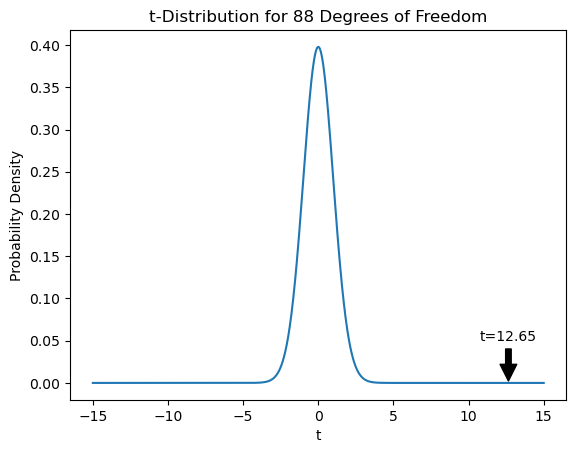

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

from IPython.display import display, Markdown

# Set the seed for reproducibility
np.random.seed(42)
df = nx + ny - 2  # compute degrees of freedom
x = np.linspace(-15, 15, 1000)  # Range of x values
y = t.pdf(x, df) 
plt.plot(x, y)

plt.xlabel('t')
plt.ylabel('Probability Density')
plt.title(f't-Distribution for {df} Degrees of Freedom')

specific_x = 0  # Specific x-value for the annotation
specific_y = t.pdf(specific_x, df)  # Calculate the y-value at this x

t_statistic = (xbar - ybar) / SE
print(f"Placed annotation at t={t_statistic}")

plt.annotate(f't={t_statistic:.2f}', (t_statistic, 0), 
              textcoords="offset points", 
              xytext=(0,30), 
              ha='center',
              arrowprops=dict(facecolor='black', shrink=0.05))


plt.show()



len(A)=40
len(b)=50
len(combined_samples)=90
100000


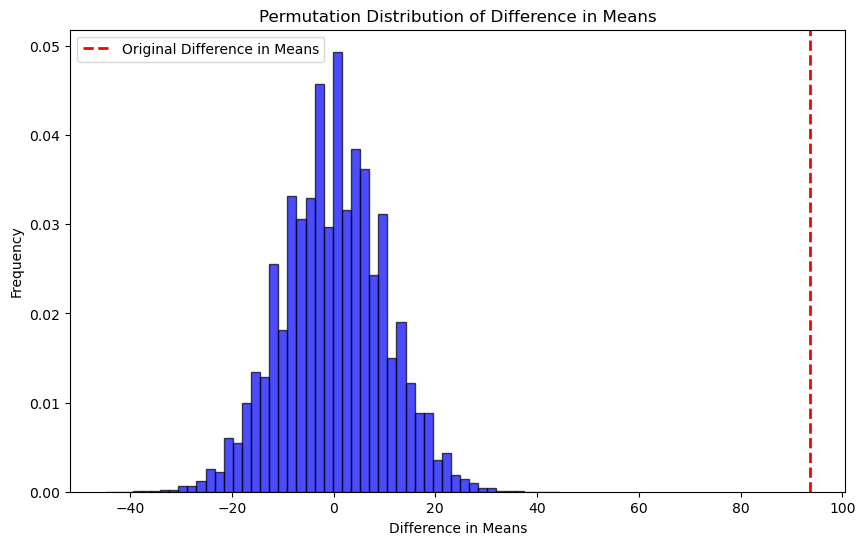

In [85]:
permutation_diffs = permutation_test_statistic(X, 
                                               Y, R=100000)
print(len(permutation_diffs))
plot_permutation_distribution(X, Y, 
                              permutation_diffs, bins=50)

In [86]:
original_diff = np.mean(X) - np.mean(Y)
                                               
# Assuming permutation_diffs and original_diff are already defined
p_value = compute_p_value(permutation_diffs, original_diff)

print(f"P-value: {p_value}")

P-value: 0.0


In [96]:
s_permute = np.std(permutation_diffs, ddof=1)
print(f"standard deviation of the permutation distribution {s_permute}")

display(Markdown(r"\\[s_{permute} = " + f"{s_permute:0.4}" + r"\\]"))
display(Markdown(r"\\[\frac{\bar{x}-\bar{y}}{s_{permute}}=" + f"{(original_diff / s_permute):0.4}"+ r"\\]"))


standard deviation of the permutation distribution 9.973827787554322


\\[s_{permute} = 9.974\\]

\\[\frac{\bar{x}-\bar{y}}{s_{permute}}=9.388\\]